# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [89]:
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [90]:
matches=pd.read_csv('/kaggle/input/matches-2020-21-premier-league/matches.csv')
matches.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Notes
0,1.0,Sat,2020-09-12,12:30 (06:30),Fulham,0.2,0–3,1.8,Arsenal,Craven Cottage,NaN
1,1.0,Sat,2020-09-12,15:00 (09:00),Crystal Palace,0.7,1–0,0.8,Southampton,Selhurst Park,NaN
2,1.0,Sat,2020-09-12,17:30 (11:30),Liverpool,3.3,4–3,0.6,Leeds United,Anfield,NaN
3,1.0,Sat,2020-09-12,20:00 (14:00),West Ham,1.1,0–2,1.5,Newcastle Utd,London Stadium,NaN
4,1.0,Sun,2020-09-13,14:00 (08:00),West Brom,0.5,0–3,2.2,Leicester City,The Hawthorns,NaN


# Data Exploration and Cleaning

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wk      380 non-null    float64
 1   Day     380 non-null    object 
 2   Date    380 non-null    object 
 3   Time    380 non-null    object 
 4   Home    380 non-null    object 
 5   xG      380 non-null    float64
 6   Score   380 non-null    object 
 7   xG.1    380 non-null    float64
 8   Away    380 non-null    object 
 9   Venue   380 non-null    object 
 10  Notes   0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 37.9+ KB


In [6]:
matches.isna().sum()

Wk        60
Day       60
Date      60
Time      60
Home      60
xG        60
Score     60
xG.1      60
Away      60
Venue     60
Notes    440
dtype: int64

In [7]:
matches.drop('Notes',axis=1,inplace=True)
matches.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue
0,1.0,Sat,2020-09-12,12:30 (06:30),Fulham,0.2,0–3,1.8,Arsenal,Craven Cottage
1,1.0,Sat,2020-09-12,15:00 (09:00),Crystal Palace,0.7,1–0,0.8,Southampton,Selhurst Park
2,1.0,Sat,2020-09-12,17:30 (11:30),Liverpool,3.3,4–3,0.6,Leeds United,Anfield
3,1.0,Sat,2020-09-12,20:00 (14:00),West Ham,1.1,0–2,1.5,Newcastle Utd,London Stadium
4,1.0,Sun,2020-09-13,14:00 (08:00),West Brom,0.5,0–3,2.2,Leicester City,The Hawthorns


In [8]:
missing_rows = matches[matches.isnull().any(axis=1)]
print(missing_rows)


     Wk  Day Date Time Home  xG Score  xG.1 Away Venue
8   NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
19  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
30  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
41  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
52  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
63  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
74  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
85  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
96  NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
107 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
117 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
128 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
139 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
150 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
161 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
170 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
180 NaN  NaN  NaN  NaN  NaN NaN   NaN   NaN  NaN   NaN
182 NaN  N

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
matches.iloc[6:40]

In [9]:
matches.dropna(inplace=True)

In [10]:
matches.isna().sum()

Wk       0
Day      0
Date     0
Time     0
Home     0
xG       0
Score    0
xG.1     0
Away     0
Venue    0
dtype: int64

In [11]:
matches.duplicated().sum()

0

In [12]:
matches.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue
count,380.000000,380,380,380,380,380.000000,380,380.000000,380,380
unique,NaN,7,135,26,20,NaN,34,NaN,20,20
top,NaN,Sun,2021-05-23,20:00 (14:00),Fulham,NaN,1–1,NaN,Arsenal,Craven Cottage
freq,NaN,124,10,71,19,NaN,40,NaN,19,19
mean,19.500000,NaN,NaN,NaN,NaN,1.370263,NaN,1.261579,NaN,NaN
std,10.980313,NaN,NaN,NaN,NaN,0.801506,NaN,0.716704,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,10.000000,NaN,NaN,NaN,NaN,0.800000,NaN,0.700000,NaN,NaN
50%,19.500000,NaN,NaN,NaN,NaN,1.200000,NaN,1.200000,NaN,NaN
75%,29.000000,NaN,NaN,NaN,NaN,1.800000,NaN,1.700000,NaN,NaN


In [13]:
matches.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue
0,1.0,Sat,2020-09-12,12:30 (06:30),Fulham,0.2,0–3,1.8,Arsenal,Craven Cottage
1,1.0,Sat,2020-09-12,15:00 (09:00),Crystal Palace,0.7,1–0,0.8,Southampton,Selhurst Park
2,1.0,Sat,2020-09-12,17:30 (11:30),Liverpool,3.3,4–3,0.6,Leeds United,Anfield
3,1.0,Sat,2020-09-12,20:00 (14:00),West Ham,1.1,0–2,1.5,Newcastle Utd,London Stadium
4,1.0,Sun,2020-09-13,14:00 (08:00),West Brom,0.5,0–3,2.2,Leicester City,The Hawthorns


In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 439
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wk      380 non-null    float64
 1   Day     380 non-null    object 
 2   Date    380 non-null    object 
 3   Time    380 non-null    object 
 4   Home    380 non-null    object 
 5   xG      380 non-null    float64
 6   Score   380 non-null    object 
 7   xG.1    380 non-null    float64
 8   Away    380 non-null    object 
 9   Venue   380 non-null    object 
dtypes: float64(3), object(7)
memory usage: 32.7+ KB


In [15]:
matches['Wk']=matches['Wk'].astype(int)


In [16]:
matches['Date']=pd.to_datetime(matches['Date'],errors='coerce')

In [17]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 439
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Wk      380 non-null    int64         
 1   Day     380 non-null    object        
 2   Date    380 non-null    datetime64[ns]
 3   Time    380 non-null    object        
 4   Home    380 non-null    object        
 5   xG      380 non-null    float64       
 6   Score   380 non-null    object        
 7   xG.1    380 non-null    float64       
 8   Away    380 non-null    object        
 9   Venue   380 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 32.7+ KB


In [18]:
matches.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue
0,1,Sat,2020-09-12,12:30 (06:30),Fulham,0.2,0–3,1.8,Arsenal,Craven Cottage
1,1,Sat,2020-09-12,15:00 (09:00),Crystal Palace,0.7,1–0,0.8,Southampton,Selhurst Park
2,1,Sat,2020-09-12,17:30 (11:30),Liverpool,3.3,4–3,0.6,Leeds United,Anfield
3,1,Sat,2020-09-12,20:00 (14:00),West Ham,1.1,0–2,1.5,Newcastle Utd,London Stadium
4,1,Sun,2020-09-13,14:00 (08:00),West Brom,0.5,0–3,2.2,Leicester City,The Hawthorns


In [19]:
matches[['HomeGoals','AwayGoals']]=matches['Score'].str.split('–', expand=True)

In [20]:
matches.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals
0,1,Sat,2020-09-12,12:30 (06:30),Fulham,0.2,0–3,1.8,Arsenal,Craven Cottage,0,3
1,1,Sat,2020-09-12,15:00 (09:00),Crystal Palace,0.7,1–0,0.8,Southampton,Selhurst Park,1,0
2,1,Sat,2020-09-12,17:30 (11:30),Liverpool,3.3,4–3,0.6,Leeds United,Anfield,4,3
3,1,Sat,2020-09-12,20:00 (14:00),West Ham,1.1,0–2,1.5,Newcastle Utd,London Stadium,0,2
4,1,Sun,2020-09-13,14:00 (08:00),West Brom,0.5,0–3,2.2,Leicester City,The Hawthorns,0,3


In [21]:
matches['HomeGoals']=matches['HomeGoals'].astype(int)
matches['AwayGoals']=matches['AwayGoals'].astype(int)

In [ ]:
matches.info()

In [22]:
matches['TotalGoals']=matches['HomeGoals'] + matches['AwayGoals']


# Extracting Important Data

In [23]:
matches.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals
0,1,Sat,2020-09-12,12:30 (06:30),Fulham,0.2,0–3,1.8,Arsenal,Craven Cottage,0,3,3
1,1,Sat,2020-09-12,15:00 (09:00),Crystal Palace,0.7,1–0,0.8,Southampton,Selhurst Park,1,0,1
2,1,Sat,2020-09-12,17:30 (11:30),Liverpool,3.3,4–3,0.6,Leeds United,Anfield,4,3,7
3,1,Sat,2020-09-12,20:00 (14:00),West Ham,1.1,0–2,1.5,Newcastle Utd,London Stadium,0,2,2
4,1,Sun,2020-09-13,14:00 (08:00),West Brom,0.5,0–3,2.2,Leicester City,The Hawthorns,0,3,3


# Analysis of 2020/21 season

In [24]:
ManUtd=matches[(matches['Home'] == 'Manchester Utd') | 
                         (matches['Away'] == 'Manchester Utd')]

In [25]:
ManUtd


,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals
11,2,Sat,2020-09-19,17:30 (11:30),Manchester Utd,1.1,1–3,1.6,Crystal Palace,Old Trafford,1,3,4
20,3,Sat,2020-09-26,12:30 (06:30),Brighton,2.4,2–3,1.1,Manchester Utd,The American Express Community Stadium,2,3,5
39,4,Sun,2020-10-04,16:30 (10:30),Manchester Utd,0.9,1–6,3.8,Tottenham,Old Trafford,1,6,7
45,5,Sat,2020-10-17,20:00 (14:00),Newcastle Utd,0.5,1–4,2.7,Manchester Utd,St. James' Park,1,4,5
56,6,Sat,2020-10-24,17:30 (11:30),Manchester Utd,0.7,0–0,0.2,Chelsea,Old Trafford,0,0,0
70,7,Sun,2020-11-01,16:30 (10:30),Manchester Utd,0.3,0–1,1.1,Arsenal,Old Trafford,0,1,1
77,8,Sat,2020-11-07,12:30 (06:30),Everton,0.6,1–3,1.6,Manchester Utd,Goodison Park,1,3,4
89,9,Sat,2020-11-21,20:00 (14:00),Manchester Utd,2.5,1–0,0.6,West Brom,Old Trafford,1,0,1
102,10,Sun,2020-11-29,14:00 (08:00),Southampton,0.4,2–3,2.3,Manchester Utd,St. Mary's Stadium,2,3,5
110,11,Sat,2020-12-05,17:30 (11:30),West Ham,2.2,1–3,1.9,Manchester Utd,London Stadium,1,3,4


In [26]:
manuAway=ManUtd[ManUtd['Away']=='Manchester Utd']
manuAway

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals
20,3,Sat,2020-09-26,12:30 (06:30),Brighton,2.4,2–3,1.1,Manchester Utd,The American Express Community Stadium,2,3,5
45,5,Sat,2020-10-17,20:00 (14:00),Newcastle Utd,0.5,1–4,2.7,Manchester Utd,St. James' Park,1,4,5
77,8,Sat,2020-11-07,12:30 (06:30),Everton,0.6,1–3,1.6,Manchester Utd,Goodison Park,1,3,4
102,10,Sun,2020-11-29,14:00 (08:00),Southampton,0.4,2–3,2.3,Manchester Utd,St. Mary's Stadium,2,3,5
110,11,Sat,2020-12-05,17:30 (11:30),West Ham,2.2,1–3,1.9,Manchester Utd,London Stadium,1,3,4
138,13,Thu,2020-12-17,20:00 (14:00),Sheffield Utd,1.6,2–3,2.0,Manchester Utd,Bramall Lane,2,3,5
151,15,Sat,2020-12-26,12:30 (06:30),Leicester City,1.2,2–2,2.2,Manchester Utd,King Power Stadium,2,2,4
183,1,Tue,2021-01-12,20:15 (14:15),Burnley,0.9,0–1,1.2,Manchester Utd,Turf Moor,0,1,1
198,19,Sun,2021-01-17,16:30 (10:30),Liverpool,1.7,0–0,0.9,Manchester Utd,Anfield,0,0,0
207,18,Wed,2021-01-20,20:15 (14:15),Fulham,0.9,1–2,1.2,Manchester Utd,Craven Cottage,1,2,3


In [27]:
manuHome=ManUtd[ManUtd['Home']=='Manchester Utd']
manuHome

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals
11,2,Sat,2020-09-19,17:30 (11:30),Manchester Utd,1.1,1–3,1.6,Crystal Palace,Old Trafford,1,3,4
39,4,Sun,2020-10-04,16:30 (10:30),Manchester Utd,0.9,1–6,3.8,Tottenham,Old Trafford,1,6,7
56,6,Sat,2020-10-24,17:30 (11:30),Manchester Utd,0.7,0–0,0.2,Chelsea,Old Trafford,0,0,0
70,7,Sun,2020-11-01,16:30 (10:30),Manchester Utd,0.3,0–1,1.1,Arsenal,Old Trafford,0,1,1
89,9,Sat,2020-11-21,20:00 (14:00),Manchester Utd,2.5,1–0,0.6,West Brom,Old Trafford,1,0,1
121,12,Sat,2020-12-12,17:30 (11:30),Manchester Utd,1.0,0–0,1.2,Manchester City,Old Trafford,0,0,0
146,14,Sun,2020-12-20,16:30 (10:30),Manchester Utd,4.0,6–2,1.7,Leeds United,Old Trafford,6,2,8
168,16,Tue,2020-12-29,20:00 (14:00),Manchester Utd,1.3,1–0,0.4,Wolves,Old Trafford,1,0,1
172,17,Fri,2021-01-01,20:00 (14:00),Manchester Utd,1.9,2–1,1.6,Aston Villa,Old Trafford,2,1,3
219,20,Wed,2021-01-27,20:15 (14:15),Manchester Utd,1.7,1–2,1.0,Sheffield Utd,Old Trafford,1,2,3


In [28]:
GoalsA=manuAway['AwayGoals'].sum()
GoalsA

35

In [29]:
GoalsH=manuHome['HomeGoals'].sum()
GoalsH

38

In [30]:
GoalsA_con=manuAway['HomeGoals'].sum()
GoalsA_con

16

In [31]:
GoalsH_con=manuHome['AwayGoals'].sum()
GoalsH_con

28

In [32]:
goals_away=manuAway.groupby('Home')['AwayGoals'].sum()
goals_away

Home
Arsenal            0
Aston Villa        3
Brighton           3
Burnley            1
Chelsea            0
Crystal Palace     0
Everton            3
Fulham             2
Leeds United       0
Leicester City     2
Liverpool          0
Manchester City    2
Newcastle Utd      4
Sheffield Utd      3
Southampton        3
Tottenham          3
West Brom          1
West Ham           3
Wolves             2
Name: AwayGoals, dtype: int64

In [33]:
goals_home=manuHome.groupby('Away')['HomeGoals'].sum()
goals_home

Away
Arsenal            0
Aston Villa        2
Brighton           2
Burnley            3
Chelsea            0
Crystal Palace     1
Everton            3
Fulham             1
Leeds United       6
Leicester City     1
Liverpool          2
Manchester City    0
Newcastle Utd      3
Sheffield Utd      1
Southampton        9
Tottenham          1
West Brom          1
West Ham           1
Wolves             1
Name: HomeGoals, dtype: int64

In [34]:
HomeGoals_conceded=manuHome.groupby('Away')['AwayGoals'].sum()
HomeGoals_conceded

Away
Arsenal            1
Aston Villa        1
Brighton           1
Burnley            1
Chelsea            0
Crystal Palace     3
Everton            3
Fulham             1
Leeds United       2
Leicester City     2
Liverpool          4
Manchester City    0
Newcastle Utd      1
Sheffield Utd      2
Southampton        0
Tottenham          6
West Brom          0
West Ham           0
Wolves             0
Name: AwayGoals, dtype: int64

In [35]:
AwayGoals_conceded=manuAway.groupby('Home')['HomeGoals'].sum()
AwayGoals_conceded

Home
Arsenal            0
Aston Villa        1
Brighton           2
Burnley            0
Chelsea            0
Crystal Palace     0
Everton            1
Fulham             1
Leeds United       0
Leicester City     2
Liverpool          0
Manchester City    0
Newcastle Utd      1
Sheffield Utd      2
Southampton        2
Tottenham          1
West Brom          1
West Ham           1
Wolves             1
Name: HomeGoals, dtype: int64

In [36]:
goals_df=pd.DataFrame({
    'Home Goals': goals_home,
    'Away Goals': goals_away
})

In [37]:
goals_df

,Home Goals,Away Goals
Arsenal,0,0
Aston Villa,2,3
Brighton,2,3
Burnley,3,1
Chelsea,0,0
Crystal Palace,1,0
Everton,3,3
Fulham,1,2
Leeds United,6,0
Leicester City,1,2


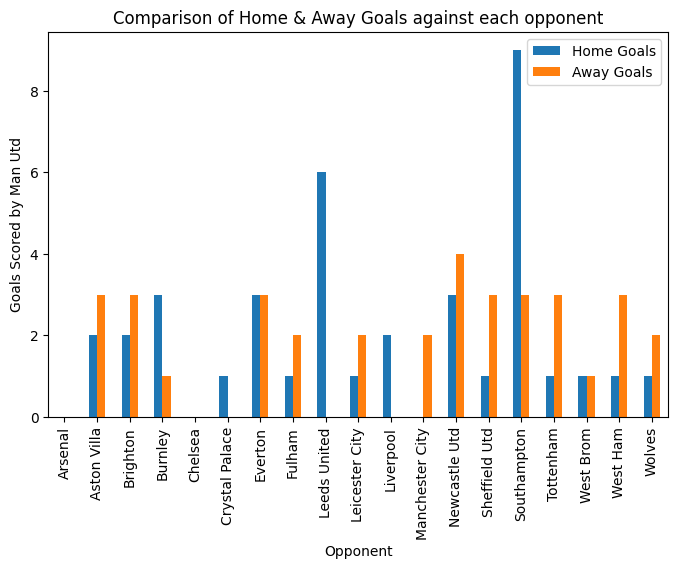

In [38]:
goals_df.plot(kind='bar',figsize=(8,5))
plt.xlabel('Opponent')
plt.ylabel('Goals Scored by Man Utd')
plt.title('Comparison of Home & Away Goals against each opponent')
plt.legend()
plt.show()

### This bar chart shows that they have higher scoring rate in away games but due to an outlier (the game against southampton) the sum of totalgoals might say otherwise

In [39]:
goals_df['GoalsConceded_home']=HomeGoals_conceded
goals_df['GoalsConceded_away']=AwayGoals_conceded

In [40]:
goals_df

,Home Goals,Away Goals,GoalsConceded_home,GoalsConceded_away
Arsenal,0,0,1,0
Aston Villa,2,3,1,1
Brighton,2,3,1,2
Burnley,3,1,1,0
Chelsea,0,0,0,0
Crystal Palace,1,0,3,0
Everton,3,3,3,1
Fulham,1,2,1,1
Leeds United,6,0,2,0
Leicester City,1,2,2,2


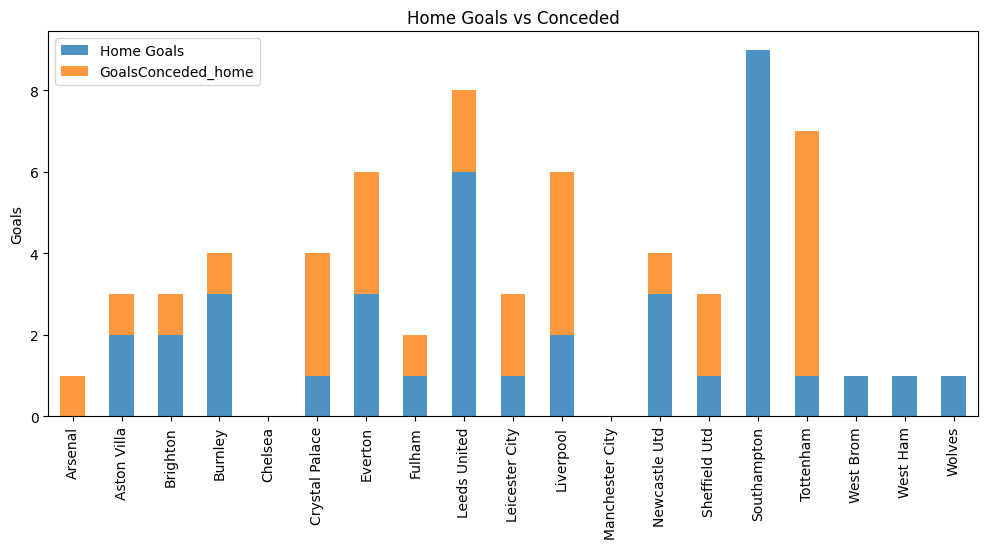

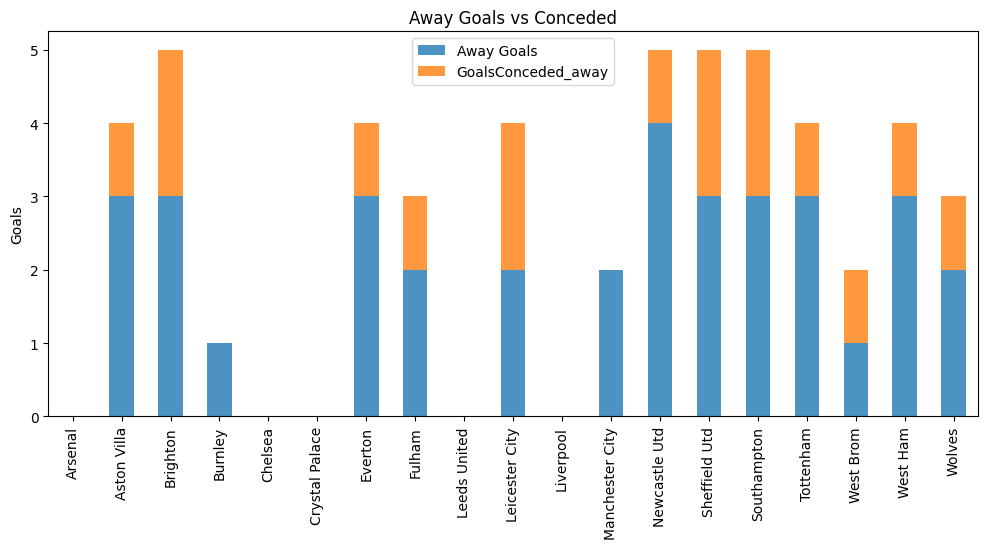

In [41]:
goals_df[['Home Goals','GoalsConceded_home']].plot(
    kind='bar', stacked=True, figsize=(12,5), alpha=0.8)
plt.title("Home Goals vs Conceded")
plt.ylabel("Goals")
plt.show()

goals_df[['Away Goals','GoalsConceded_away']].plot(
    kind='bar', stacked=True, figsize=(12,5), alpha=0.8)
plt.title("Away Goals vs Conceded")
plt.ylabel("Goals")
plt.show()

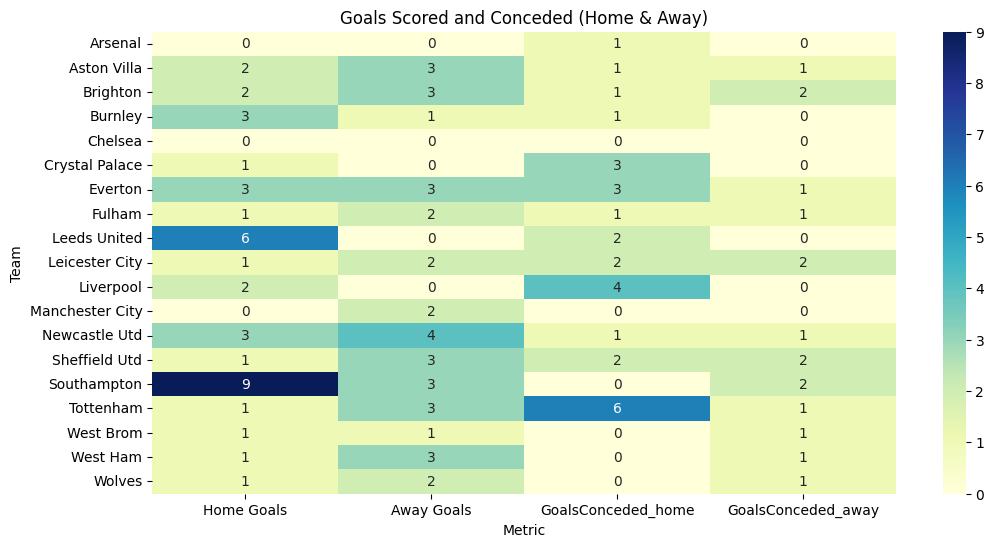

In [42]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(goals_df, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Goals Scored and Conceded (Home & Away)")
plt.ylabel("Team")
plt.xlabel("Metric")
plt.show()


In [43]:
goals_df.describe(include='all')

,Home Goals,Away Goals,GoalsConceded_home,GoalsConceded_away
count,19.000000,19.000000,19.000000,19.000000
mean,2.000000,1.842105,1.473684,0.842105
std,2.211083,1.344254,1.611363,0.764719
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.500000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000
75%,2.500000,3.000000,2.000000,1.000000
max,9.000000,4.000000,6.000000,2.000000


In [44]:
goals_df['Home Goals'].sum()

38

In [45]:
goals_df['GoalsConceded_home'].sum()

28

**If you look at only mean from the above table you'll think that utd had a better goal-scoring campaign at home rather than away and the sum of total goals also suggest that, but statistically if you look at the median it will show you that they had more consistent run at away, as the median is not biased towards the outliers also when you look at the std of home goals mean you'll see a rather larger spread which suggests there must be some outliers which we know they exist (The game vs southampton where they scored 9 goals vs a 10 men southampton) other than that in comparsion UNITED had a better consistent scoring rate at away rather home**

**Same goes for goals conceded, in my opinion whaat this data suggests is they were a better defense at away. The mean suggests that there is some outlier in goals conceded home, but even after that the quartile ranges tells us that they still conceded less at away than they did at home**

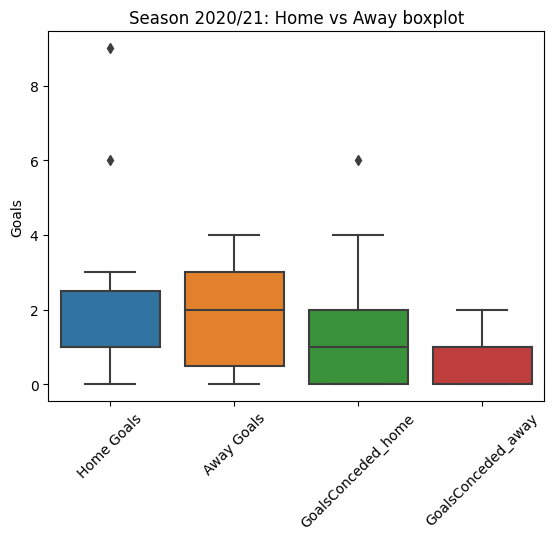

In [46]:
sns.boxplot(goals_df)
plt.title('Season 2020/21: Home vs Away boxplot')
plt.xticks(rotation=45)
plt.ylabel('Goals')
plt.show()

**This shows how united had a better campaign at away games as they scored more consistently, Home goals contains outliers which forces the sum to be more than away goals.**


**Also clearly they were a better defensive unit at away conceding 16 goals, even after ignoring the outliers**

In [47]:
manuHome

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals
11,2,Sat,2020-09-19,17:30 (11:30),Manchester Utd,1.1,1–3,1.6,Crystal Palace,Old Trafford,1,3,4
39,4,Sun,2020-10-04,16:30 (10:30),Manchester Utd,0.9,1–6,3.8,Tottenham,Old Trafford,1,6,7
56,6,Sat,2020-10-24,17:30 (11:30),Manchester Utd,0.7,0–0,0.2,Chelsea,Old Trafford,0,0,0
70,7,Sun,2020-11-01,16:30 (10:30),Manchester Utd,0.3,0–1,1.1,Arsenal,Old Trafford,0,1,1
89,9,Sat,2020-11-21,20:00 (14:00),Manchester Utd,2.5,1–0,0.6,West Brom,Old Trafford,1,0,1
121,12,Sat,2020-12-12,17:30 (11:30),Manchester Utd,1.0,0–0,1.2,Manchester City,Old Trafford,0,0,0
146,14,Sun,2020-12-20,16:30 (10:30),Manchester Utd,4.0,6–2,1.7,Leeds United,Old Trafford,6,2,8
168,16,Tue,2020-12-29,20:00 (14:00),Manchester Utd,1.3,1–0,0.4,Wolves,Old Trafford,1,0,1
172,17,Fri,2021-01-01,20:00 (14:00),Manchester Utd,1.9,2–1,1.6,Aston Villa,Old Trafford,2,1,3
219,20,Wed,2021-01-27,20:15 (14:15),Manchester Utd,1.7,1–2,1.0,Sheffield Utd,Old Trafford,1,2,3


In [48]:
manuAway

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals
20,3,Sat,2020-09-26,12:30 (06:30),Brighton,2.4,2–3,1.1,Manchester Utd,The American Express Community Stadium,2,3,5
45,5,Sat,2020-10-17,20:00 (14:00),Newcastle Utd,0.5,1–4,2.7,Manchester Utd,St. James' Park,1,4,5
77,8,Sat,2020-11-07,12:30 (06:30),Everton,0.6,1–3,1.6,Manchester Utd,Goodison Park,1,3,4
102,10,Sun,2020-11-29,14:00 (08:00),Southampton,0.4,2–3,2.3,Manchester Utd,St. Mary's Stadium,2,3,5
110,11,Sat,2020-12-05,17:30 (11:30),West Ham,2.2,1–3,1.9,Manchester Utd,London Stadium,1,3,4
138,13,Thu,2020-12-17,20:00 (14:00),Sheffield Utd,1.6,2–3,2.0,Manchester Utd,Bramall Lane,2,3,5
151,15,Sat,2020-12-26,12:30 (06:30),Leicester City,1.2,2–2,2.2,Manchester Utd,King Power Stadium,2,2,4
183,1,Tue,2021-01-12,20:15 (14:15),Burnley,0.9,0–1,1.2,Manchester Utd,Turf Moor,0,1,1
198,19,Sun,2021-01-17,16:30 (10:30),Liverpool,1.7,0–0,0.9,Manchester Utd,Anfield,0,0,0
207,18,Wed,2021-01-20,20:15 (14:15),Fulham,0.9,1–2,1.2,Manchester Utd,Craven Cottage,1,2,3


In [49]:
homeutdxG=manuHome['xG'].sum()
homexGA=manuHome['xG.1'].sum()

homexGD=homeutdxG-homexGA
homexGD

10.099999999999998

In [50]:
awayutdxG=manuAway['xG.1'].sum()
awayxGA=manuAway['xG'].sum()

awayxGD= awayutdxG - awayxGA
awayxGD

7.900000000000002

In [52]:
homeGoals=goals_df['Home Goals'].sum()
homeGoalsA=goals_df['GoalsConceded_home'].sum()

homeGD= homeGoals - homeGoalsA
homeGD




10

In [53]:
awayGoals=goals_df['Away Goals'].sum()
awayGoalsA=goals_df['GoalsConceded_away'].sum()

awayGD= awayGoals - awayGoalsA
awayGD

19

In [54]:
GD=pd.DataFrame({
    'United Goals': [homeGoals],
    'Opponent Goals': [homeGoalsA],
    'Home GD': [homeGD],
    'United Away Goals':[awayGoals],
    'Opponent Goals Away': [awayGoalsA],
    'Away GD': [awayGD],
    'United xG':[homeutdxG],
    'Opponent xG':[homexGA],
    'Expected HomeGD': [homexGD],
    'United  Away xG' :[awayutdxG],
    'Opponent xG Away': [awayxGA],
    'Expected AwayGD': [awayxGD]
})

In [55]:
GD

,United Goals,Opponent Goals,Home GD,United Away Goals,Opponent Goals Away,Away GD,United xG,Opponent xG,Expected HomeGD,United Away xG,Opponent xG Away,Expected AwayGD
0,38,28,10,35,16,19,31.6,21.5,10.1,28.7,20.8,7.9


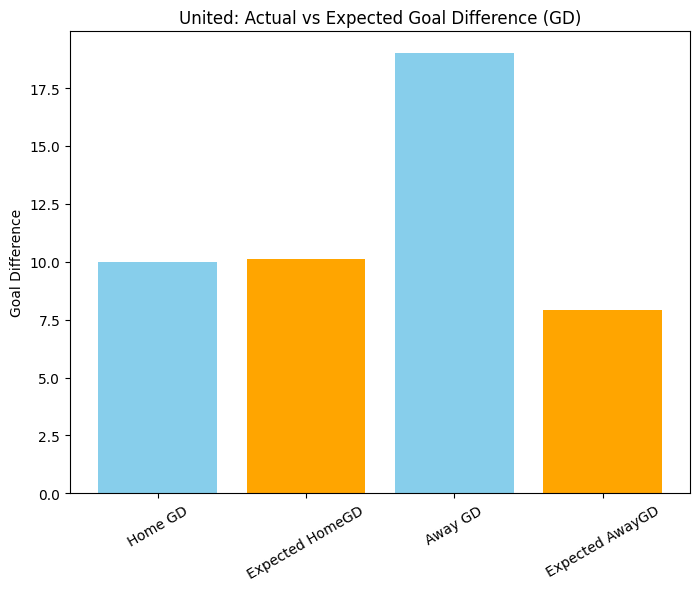

In [56]:
gd_comparison = GD[['Home GD', 'Expected HomeGD', 'Away GD', 'Expected AwayGD']].melt(
    var_name="Metric", value_name="Value"
)


plt.figure(figsize=(8,6))
plt.bar(gd_comparison["Metric"], gd_comparison["Value"], color=["skyblue","orange","skyblue","orange"])
plt.title("United: Actual vs Expected Goal Difference (GD)")
plt.ylabel("Goal Difference")
plt.xticks(rotation=30)

plt.show()

**Overall takeaway** 

• At Home: United performed as expected. 

• Away: United massively outperformed xG (clinical finishing + resilient 
defense/keeper).

In [57]:
def get_result(row):
    if row["HomeGoals"] > row["AwayGoals"]:
        return "Win"
    elif row["HomeGoals"] < row["AwayGoals"]:
        return "Lost"
    else:
        return "Draw"

manuHome["Result"] = manuHome.apply(get_result, axis=1)

/tmp/ipykernel_36/3309966418.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manuHome["Result"] = manuHome.apply(get_result, axis=1)


In [59]:
manuHome.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals,Result
11,2,Sat,2020-09-19,17:30 (11:30),Manchester Utd,1.1,1–3,1.6,Crystal Palace,Old Trafford,1,3,4,Lost
39,4,Sun,2020-10-04,16:30 (10:30),Manchester Utd,0.9,1–6,3.8,Tottenham,Old Trafford,1,6,7,Lost
56,6,Sat,2020-10-24,17:30 (11:30),Manchester Utd,0.7,0–0,0.2,Chelsea,Old Trafford,0,0,0,Draw
70,7,Sun,2020-11-01,16:30 (10:30),Manchester Utd,0.3,0–1,1.1,Arsenal,Old Trafford,0,1,1,Lost
89,9,Sat,2020-11-21,20:00 (14:00),Manchester Utd,2.5,1–0,0.6,West Brom,Old Trafford,1,0,1,Win


In [60]:
def get_result_away(row):
    if row["AwayGoals"] > row["HomeGoals"]:
        return "Win"
    elif row["AwayGoals"] < row["HomeGoals"]:
        return "Lost"
    else:
        return "Draw"

manuAway["Result"] = manuAway.apply(get_result_away, axis=1)

/tmp/ipykernel_36/1422103639.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manuAway["Result"] = manuAway.apply(get_result_away, axis=1)


In [61]:
manuAway.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals,Result
20,3,Sat,2020-09-26,12:30 (06:30),Brighton,2.4,2–3,1.1,Manchester Utd,The American Express Community Stadium,2,3,5,Win
45,5,Sat,2020-10-17,20:00 (14:00),Newcastle Utd,0.5,1–4,2.7,Manchester Utd,St. James' Park,1,4,5,Win
77,8,Sat,2020-11-07,12:30 (06:30),Everton,0.6,1–3,1.6,Manchester Utd,Goodison Park,1,3,4,Win
102,10,Sun,2020-11-29,14:00 (08:00),Southampton,0.4,2–3,2.3,Manchester Utd,St. Mary's Stadium,2,3,5,Win
110,11,Sat,2020-12-05,17:30 (11:30),West Ham,2.2,1–3,1.9,Manchester Utd,London Stadium,1,3,4,Win


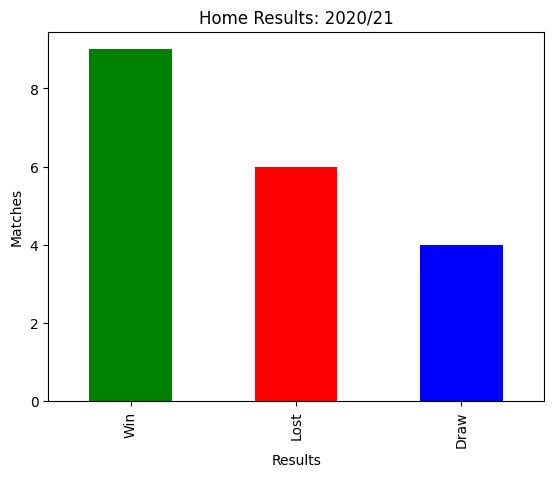

In [62]:
colors = ['green', 'red', 'blue']
manuHome['Result'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Results')
plt.ylabel('Matches')
plt.title('Home Results: 2020/21')
plt.show()


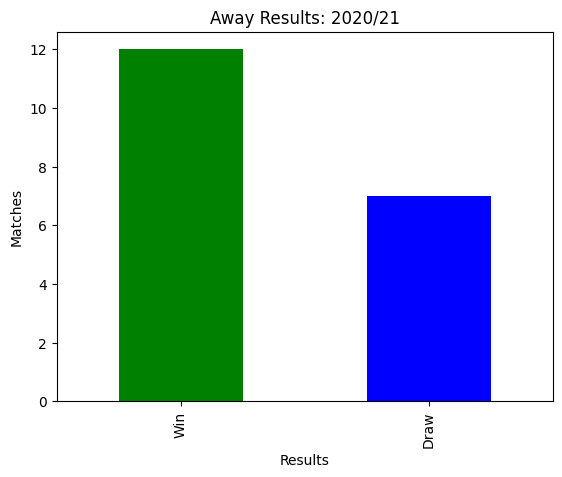

In [63]:
colors = ['Green', 'Blue']
manuAway['Result'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Results')
plt.ylabel('Matches')
plt.title('Away Results: 2020/21')
plt.show()

**Manchester United were far stronger away from 
home, going unbeaten in all 19 away fixtures (12 wins, 7 draws). In contrast, they struggled 
at Old Trafford, managing only 9 wins while suffering 6 defeats and 4 draws**

In [64]:
def get_result_away(row):
    if row["AwayGoals"] > row["HomeGoals"]:
        return "Win"
    elif row["AwayGoals"] < row["HomeGoals"]:
        return "Lost"
    else:
        return "Draw"



In [65]:
ManUtd["Result"] = ManUtd.apply(get_result_away, axis=1)

/tmp/ipykernel_36/3482422811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ManUtd["Result"] = ManUtd.apply(get_result_away, axis=1)


In [66]:
ManUtd['Date'] = pd.to_datetime(ManUtd['Date'], errors='coerce')

# Extract month name
ManUtd['Month'] = ManUtd['Date'].dt.month_name()

/tmp/ipykernel_36/3092119630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ManUtd['Date'] = pd.to_datetime(ManUtd['Date'], errors='coerce')
/tmp/ipykernel_36/3092119630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ManUtd['Month'] = ManUtd['Date'].dt.month_name()


In [67]:
ManUtd.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals,Result,Month
11,2,Sat,2020-09-19,17:30 (11:30),Manchester Utd,1.1,1–3,1.6,Crystal Palace,Old Trafford,1,3,4,Win,September
20,3,Sat,2020-09-26,12:30 (06:30),Brighton,2.4,2–3,1.1,Manchester Utd,The American Express Community Stadium,2,3,5,Win,September
39,4,Sun,2020-10-04,16:30 (10:30),Manchester Utd,0.9,1–6,3.8,Tottenham,Old Trafford,1,6,7,Win,October
45,5,Sat,2020-10-17,20:00 (14:00),Newcastle Utd,0.5,1–4,2.7,Manchester Utd,St. James' Park,1,4,5,Win,October
56,6,Sat,2020-10-24,17:30 (11:30),Manchester Utd,0.7,0–0,0.2,Chelsea,Old Trafford,0,0,0,Draw,October


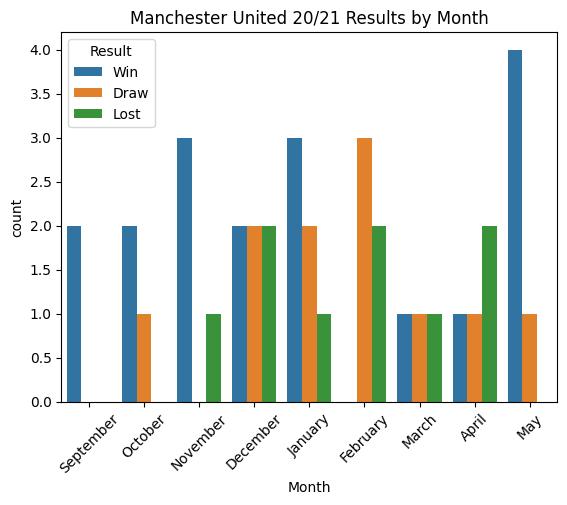

In [68]:
sns.countplot(data=ManUtd, x='Month', hue='Result')
plt.xticks(rotation=45)
plt.title("Manchester United 20/21 Results by Month")
plt.show()

**They overall had a pretty balanced season except for february where they couldn't register a single win and that's probably what cost them the league.**

In [69]:
manuHome.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,HomeGoals,AwayGoals,TotalGoals,Result
11,2,Sat,2020-09-19,17:30 (11:30),Manchester Utd,1.1,1–3,1.6,Crystal Palace,Old Trafford,1,3,4,Lost
39,4,Sun,2020-10-04,16:30 (10:30),Manchester Utd,0.9,1–6,3.8,Tottenham,Old Trafford,1,6,7,Lost
56,6,Sat,2020-10-24,17:30 (11:30),Manchester Utd,0.7,0–0,0.2,Chelsea,Old Trafford,0,0,0,Draw
70,7,Sun,2020-11-01,16:30 (10:30),Manchester Utd,0.3,0–1,1.1,Arsenal,Old Trafford,0,1,1,Lost
89,9,Sat,2020-11-21,20:00 (14:00),Manchester Utd,2.5,1–0,0.6,West Brom,Old Trafford,1,0,1,Win


In [77]:
manuHome['Time'] = pd.to_datetime(manuHome['Time'], errors='coerce')
manuAway['Time'] = pd.to_datetime(manuAway['Time'], errors='coerce')


/tmp/ipykernel_36/3541784824.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  manuHome['Time'] = pd.to_datetime(manuHome['Time'], errors='coerce')
/tmp/ipykernel_36/3541784824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manuHome['Time'] = pd.to_datetime(manuHome['Time'], errors='coerce')
/tmp/ipykernel_36/3541784824.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  manuAway['Time'] = pd.to_datetime(manuAway['Time'], errors='coerce')
/tmp/ipykernel_36/35417848

In [75]:
manuAway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 20 to 430
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Wk          19 non-null     int64         
 1   Day         19 non-null     object        
 2   Date        19 non-null     datetime64[ns]
 3   Time        19 non-null     object        
 4   Home        19 non-null     object        
 5   xG          19 non-null     float64       
 6   Score       19 non-null     object        
 7   xG.1        19 non-null     float64       
 8   Away        19 non-null     object        
 9   Venue       19 non-null     object        
 10  HomeGoals   19 non-null     int64         
 11  AwayGoals   19 non-null     int64         
 12  TotalGoals  19 non-null     int64         
 13  Result      19 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 2.2+ KB


In [80]:
winTimeH=manuHome[manuHome['Result']=='Win']['Time']
winTimeH.value_counts()

Time
2025-08-29 20:00:00    3
2025-08-29 16:30:00    1
2025-08-29 20:15:00    1
2025-08-29 19:00:00    1
2025-08-29 19:15:00    1
2025-08-29 19:30:00    1
2025-08-29 16:00:00    1
Name: count, dtype: int64

In [79]:
winTimeA=manuAway[manuAway['Result']=='Win']['Time']
winTimeA.value_counts()

Time
2025-08-29 12:30:00    2
2025-08-29 20:00:00    2
2025-08-29 20:15:00    2
2025-08-29 16:30:00    2
2025-08-29 14:00:00    1
2025-08-29 17:30:00    1
2025-08-29 14:05:00    1
2025-08-29 16:00:00    1
Name: count, dtype: int64

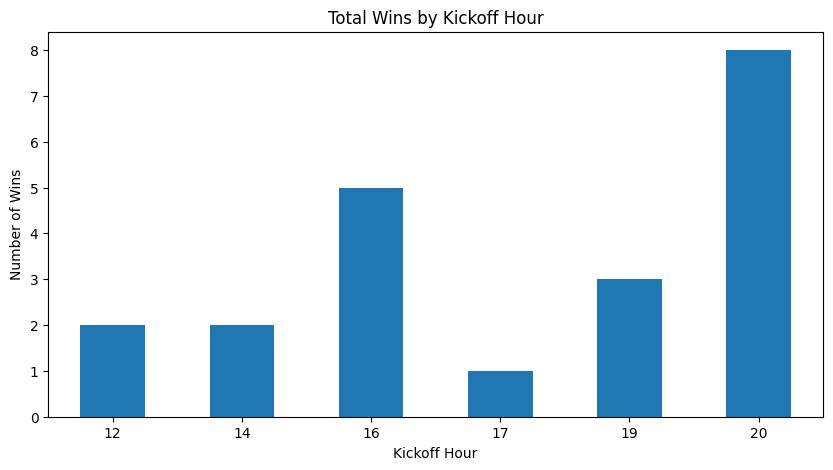

In [81]:
winTimeH = manuHome[manuHome['Result']=='Win']['Time'].apply(lambda t: t.hour)
winTimeA = manuAway[manuAway['Result']=='Win']['Time'].apply(lambda t: t.hour)


home_counts = winTimeH.value_counts()
away_counts = winTimeA.value_counts()


win_times = pd.DataFrame({
    'Home Wins': home_counts,
    'Away Wins': away_counts
}).fillna(0).astype(int)


win_times['Total Wins'] = win_times['Home Wins'] + win_times['Away Wins']


win_times['Total Wins'].sort_index().plot(kind='bar', figsize=(10,5))

plt.title("Total Wins by Kickoff Hour")
plt.xlabel("Kickoff Hour")
plt.ylabel("Number of Wins")
plt.xticks(rotation=0)
plt.show()

# Analysis of 2022/23 season

### Analysis 22/23 Season

# Importing Data fro 22/23 season

In [93]:
url='https://fbref.com/en/comps/9/2022-2023/schedule/2022-2023-Premier-League-Scores-and-Fixtures'

In [94]:
table=pd.read_html(url)

In [95]:
len(table)

1

In [96]:
df=table[0]

In [97]:
df.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2022-08-05,20:00,Crystal Palace,1.2,0–2,1.0,Arsenal,25286.0,Selhurst Park,Anthony Taylor,Match Report,NaN
1,1.0,Sat,2022-08-06,12:30,Fulham,1.2,2–2,1.2,Liverpool,22207.0,Craven Cottage,Andy Madley,Match Report,NaN
2,1.0,Sat,2022-08-06,15:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,52245.0,St James' Park,Simon Hooper,Match Report,NaN
3,1.0,Sat,2022-08-06,15:00,Bournemouth,0.6,2–0,0.7,Aston Villa,11013.0,Vitality Stadium,Peter Bankes,Match Report,NaN
4,1.0,Sat,2022-08-06,15:00,Leeds United,0.8,2–1,1.3,Wolves,36347.0,Elland Road,Robert Jones,Match Report,NaN


In [98]:
df.drop(['Attendance','Notes','Match Report'],axis=1,inplace=True)

In [99]:
df.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee
0,1.0,Fri,2022-08-05,20:00,Crystal Palace,1.2,0–2,1.0,Arsenal,Selhurst Park,Anthony Taylor
1,1.0,Sat,2022-08-06,12:30,Fulham,1.2,2–2,1.2,Liverpool,Craven Cottage,Andy Madley
2,1.0,Sat,2022-08-06,15:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,St James' Park,Simon Hooper
3,1.0,Sat,2022-08-06,15:00,Bournemouth,0.6,2–0,0.7,Aston Villa,Vitality Stadium,Peter Bankes
4,1.0,Sat,2022-08-06,15:00,Leeds United,0.8,2–1,1.3,Wolves,Elland Road,Robert Jones


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Wk       380 non-null    float64
 1   Day      380 non-null    object 
 2   Date     380 non-null    object 
 3   Time     380 non-null    object 
 4   Home     380 non-null    object 
 5   xG       380 non-null    float64
 6   Score    380 non-null    object 
 7   xG.1     380 non-null    float64
 8   Away     380 non-null    object 
 9   Venue    380 non-null    object 
 10  Referee  380 non-null    object 
dtypes: float64(3), object(8)
memory usage: 37.1+ KB


In [101]:
df.isna().sum()

Wk         50
Day        50
Date       50
Time       50
Home       50
xG         50
Score      50
xG.1       50
Away       50
Venue      50
Referee    50
dtype: int64

In [102]:
df.dropna(inplace=True)

In [103]:
df.isna().sum()

Wk         0
Day        0
Date       0
Time       0
Home       0
xG         0
Score      0
xG.1       0
Away       0
Venue      0
Referee    0
dtype: int64

In [104]:
df.duplicated().sum()

0

In [105]:
df['Wk']=df['Wk'].astype('int64')

In [106]:
df['Time']=df['Time'].astype('datetime64[ns]')

In [107]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 429
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Wk       380 non-null    int64         
 1   Day      380 non-null    object        
 2   Date     380 non-null    datetime64[ns]
 3   Time     380 non-null    datetime64[ns]
 4   Home     380 non-null    object        
 5   xG       380 non-null    float64       
 6   Score    380 non-null    object        
 7   xG.1     380 non-null    float64       
 8   Away     380 non-null    object        
 9   Venue    380 non-null    object        
 10  Referee  380 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 35.6+ KB


In [109]:
df.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee
0,1,Fri,2022-08-05,2025-08-29 20:00:00,Crystal Palace,1.2,0–2,1.0,Arsenal,Selhurst Park,Anthony Taylor
1,1,Sat,2022-08-06,2025-08-29 12:30:00,Fulham,1.2,2–2,1.2,Liverpool,Craven Cottage,Andy Madley
2,1,Sat,2022-08-06,2025-08-29 15:00:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,St James' Park,Simon Hooper
3,1,Sat,2022-08-06,2025-08-29 15:00:00,Bournemouth,0.6,2–0,0.7,Aston Villa,Vitality Stadium,Peter Bankes
4,1,Sat,2022-08-06,2025-08-29 15:00:00,Leeds United,0.8,2–1,1.3,Wolves,Elland Road,Robert Jones


In [110]:
df[['HomeGoals','AwayGoals']]=df['Score'].str.split('–', expand=True)


In [111]:
df['HomeGoals']=df['HomeGoals'].astype(int)
df['AwayGoals']=df['AwayGoals'].astype(int)

In [113]:
df['TotalGoals']=df['HomeGoals'] + df['AwayGoals']
df

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals
0,1,Fri,2022-08-05,2025-08-29 20:00:00,Crystal Palace,1.2,0–2,1.0,Arsenal,Selhurst Park,Anthony Taylor,0,2,2
1,1,Sat,2022-08-06,2025-08-29 12:30:00,Fulham,1.2,2–2,1.2,Liverpool,Craven Cottage,Andy Madley,2,2,4
2,1,Sat,2022-08-06,2025-08-29 15:00:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,St James' Park,Simon Hooper,2,0,2
3,1,Sat,2022-08-06,2025-08-29 15:00:00,Bournemouth,0.6,2–0,0.7,Aston Villa,Vitality Stadium,Peter Bankes,2,0,2
4,1,Sat,2022-08-06,2025-08-29 15:00:00,Leeds United,0.8,2–1,1.3,Wolves,Elland Road,Robert Jones,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,38,Sun,2023-05-28,2025-08-29 16:30:00,Aston Villa,2.8,2–1,1.4,Brighton,Villa Park,David Coote,2,1,3
426,38,Sun,2023-05-28,2025-08-29 16:30:00,Leeds United,1.5,1–4,2.2,Tottenham,Elland Road,Anthony Taylor,1,4,5
427,38,Sun,2023-05-28,2025-08-29 16:30:00,Arsenal,2.8,5–0,0.5,Wolves,Emirates Stadium,Andre Marriner,5,0,5
428,38,Sun,2023-05-28,2025-08-29 16:30:00,Manchester Utd,2.9,2–1,1.8,Fulham,Old Trafford,Robert Jones,2,1,3


In [114]:
ManUtd23=df[(df['Home'] == 'Manchester Utd') | 
                         (df['Away'] == 'Manchester Utd')]

In [115]:
ManUtd23

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals
8,1,Sun,2022-08-07,2025-08-29 14:00:00,Manchester Utd,1.4,1–2,1.5,Brighton,Old Trafford,Paul Tierney,1,2,3
17,2,Sat,2022-08-13,2025-08-29 17:30:00,Brentford,1.6,4–0,0.9,Manchester Utd,Brentford Community Stadium,Stuart Attwell,4,0,4
31,3,Mon,2022-08-22,2025-08-29 20:00:00,Manchester Utd,1.8,2–1,1.3,Liverpool,Old Trafford,Michael Oliver,2,1,3
33,4,Sat,2022-08-27,2025-08-29 12:30:00,Southampton,1.4,0–1,1.1,Manchester Utd,St. Mary's Stadium,Andy Madley,0,1,1
53,5,Thu,2022-09-01,2025-08-29 20:00:00,Leicester City,0.7,0–1,1.5,Manchester Utd,King Power Stadium,Craig Pawson,0,1,1
64,6,Sun,2022-09-04,2025-08-29 16:30:00,Manchester Utd,1.5,3–1,1.3,Arsenal,Old Trafford,Paul Tierney,3,1,4
81,9,Sun,2022-10-02,2025-08-29 14:00:00,Manchester City,3.2,6–3,1.7,Manchester Utd,Etihad Stadium,Michael Oliver,6,3,9
93,10,Sun,2022-10-09,2025-08-29 19:00:00,Everton,0.6,1–2,1.4,Manchester Utd,Goodison Park,David Coote,1,2,3
101,11,Sun,2022-10-16,2025-08-29 14:00:00,Manchester Utd,0.8,0–0,0.8,Newcastle Utd,Old Trafford,Craig Pawson,0,0,0
113,12,Wed,2022-10-19,2025-08-29 20:15:00,Manchester Utd,1.5,2–0,0.6,Tottenham,Old Trafford,Simon Hooper,2,0,2


In [116]:
ManuAway=ManUtd23[ManUtd23['Away']=='Manchester Utd']
ManuHome=ManUtd23[ManUtd23['Home']=='Manchester Utd']

In [117]:
ManuHome.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals
8,1,Sun,2022-08-07,2025-08-29 14:00:00,Manchester Utd,1.4,1–2,1.5,Brighton,Old Trafford,Paul Tierney,1,2,3
31,3,Mon,2022-08-22,2025-08-29 20:00:00,Manchester Utd,1.8,2–1,1.3,Liverpool,Old Trafford,Michael Oliver,2,1,3
64,6,Sun,2022-09-04,2025-08-29 16:30:00,Manchester Utd,1.5,3–1,1.3,Arsenal,Old Trafford,Paul Tierney,3,1,4
101,11,Sun,2022-10-16,2025-08-29 14:00:00,Manchester Utd,0.8,0–0,0.8,Newcastle Utd,Old Trafford,Craig Pawson,0,0,0
113,12,Wed,2022-10-19,2025-08-29 20:15:00,Manchester Utd,1.5,2–0,0.6,Tottenham,Old Trafford,Simon Hooper,2,0,2


In [118]:
ManuAway.head(2)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals
17,2,Sat,2022-08-13,2025-08-29 17:30:00,Brentford,1.6,4–0,0.9,Manchester Utd,Brentford Community Stadium,Stuart Attwell,4,0,4
33,4,Sat,2022-08-27,2025-08-29 12:30:00,Southampton,1.4,0–1,1.1,Manchester Utd,St. Mary's Stadium,Andy Madley,0,1,1


In [119]:
Goals_Home=ManuHome.groupby('Away')['HomeGoals'].sum()
Goals_Home

Away
Arsenal            3
Aston Villa        1
Bournemouth        3
Brentford          1
Brighton           1
Chelsea            4
Crystal Palace     2
Everton            2
Fulham             2
Leeds United       2
Leicester City     3
Liverpool          2
Manchester City    2
Newcastle Utd      0
Nott'ham Forest    3
Southampton        0
Tottenham          2
West Ham           1
Wolves             2
Name: HomeGoals, dtype: int64

In [120]:
Goals_Away=ManuAway.groupby('Home')['AwayGoals'].sum()
Goals_Away

Home
Arsenal            2
Aston Villa        1
Bournemouth        1
Brentford          0
Brighton           0
Chelsea            1
Crystal Palace     1
Everton            2
Fulham             2
Leeds United       2
Leicester City     1
Liverpool          0
Manchester City    3
Newcastle Utd      0
Nott'ham Forest    2
Southampton        1
Tottenham          2
West Ham           0
Wolves             1
Name: AwayGoals, dtype: int64

In [121]:
Homegls_con=ManuHome.groupby('Away')['AwayGoals'].sum()
Homegls_con

Away
Arsenal            1
Aston Villa        0
Bournemouth        0
Brentford          0
Brighton           2
Chelsea            1
Crystal Palace     1
Everton            0
Fulham             1
Leeds United       2
Leicester City     0
Liverpool          1
Manchester City    1
Newcastle Utd      0
Nott'ham Forest    0
Southampton        0
Tottenham          0
West Ham           0
Wolves             0
Name: AwayGoals, dtype: int64

In [122]:
Awaygls_con=ManuAway.groupby('Home')['HomeGoals'].sum()
Awaygls_con.sum()


33

In [123]:
goals_df23=pd.DataFrame({
    'Home Goals': Goals_Home,
    'Away Goals': Goals_Away,
    'Goals Conceded Home':Homegls_con,
    'Goals Conceded Away': Awaygls_con
})

In [124]:
goals_df23

,Home Goals,Away Goals,Goals Conceded Home,Goals Conceded Away
Arsenal,3,2,1,3
Aston Villa,1,1,0,3
Bournemouth,3,1,0,0
Brentford,1,0,0,4
Brighton,1,0,2,1
Chelsea,4,1,1,1
Crystal Palace,2,1,1,1
Everton,2,2,0,1
Fulham,2,2,1,1
Leeds United,2,2,2,0


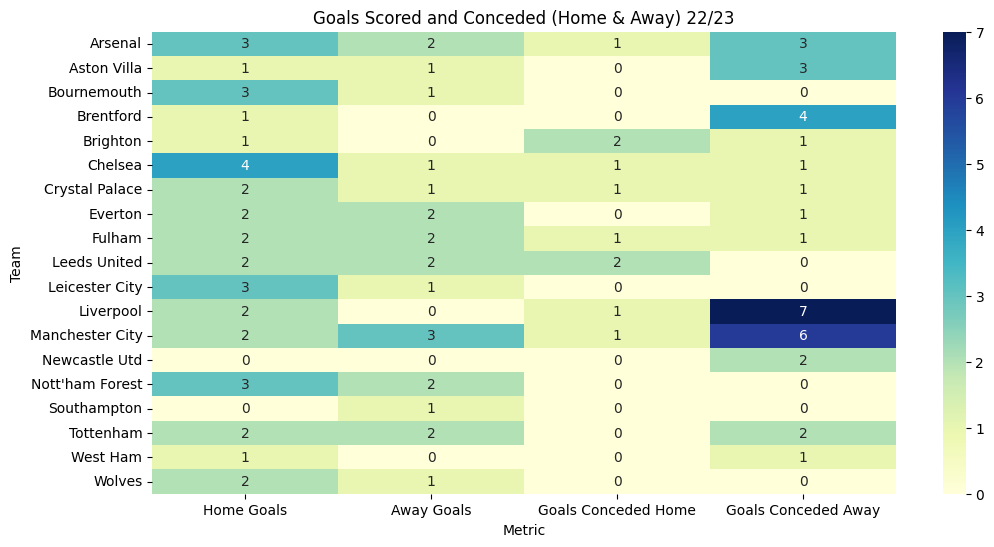

In [126]:
plt.figure(figsize=(12,6))
sns.heatmap(goals_df23, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Goals Scored and Conceded (Home & Away) 22/23")
plt.ylabel("Team")
plt.xlabel("Metric")
plt.show()

In [128]:
goals_df23.describe(include='all')

,Home Goals,Away Goals,Goals Conceded Home,Goals Conceded Away
count,19.000000,19.000000,19.000000,19.000000
mean,1.894737,1.157895,0.526316,1.736842
std,1.048530,0.898342,0.696692,2.050531
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.500000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000
75%,2.500000,2.000000,1.000000,2.500000
max,4.000000,3.000000,2.000000,7.000000


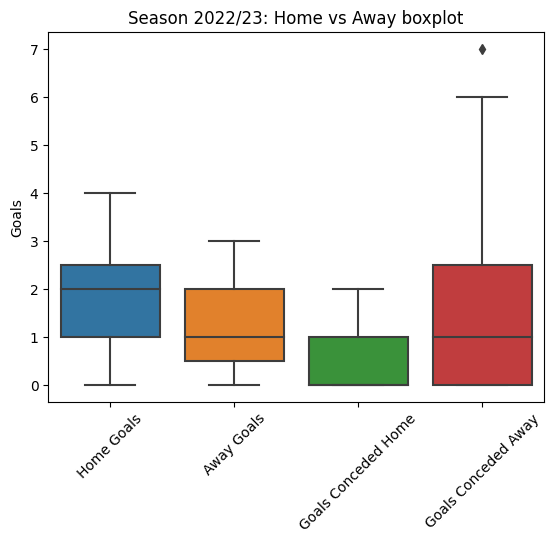

In [129]:
sns.boxplot(goals_df23)
plt.title('Season 2022/23: Home vs Away boxplot')
plt.xticks(rotation=45)
plt.ylabel('Goals')
plt.show()

**Attack: United were more consistent and slightly stronger scorers at home, though 
the presence of a home outlier suggests some inflated performances. Away scoring 
was steadier but less prolific.**

**Defense: United’s defensive base was significantly stronger at home, while away 
games revealed fragility — particularly against top opponents, where heavy defeats 
created clear statistical outliers.**


In [130]:
def get_result(row):
    if row["HomeGoals"] > row["AwayGoals"]:
        return "Win"
    elif row["HomeGoals"] < row["AwayGoals"]:
        return "Lost"
    else:
        return "Draw"



In [132]:
def get_result_away(row):
    if row["AwayGoals"] > row["HomeGoals"]:
        return "Win"
    elif row["AwayGoals"] < row["HomeGoals"]:
        return "Lost"
    else:
        return "Draw"



In [133]:
ManuHome["Result"] = ManuHome.apply(get_result, axis=1)



In [135]:
ManuHome.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals,Result
8,1,Sun,2022-08-07,2025-08-29 14:00:00,Manchester Utd,1.4,1–2,1.5,Brighton,Old Trafford,Paul Tierney,1,2,3,Lost
31,3,Mon,2022-08-22,2025-08-29 20:00:00,Manchester Utd,1.8,2–1,1.3,Liverpool,Old Trafford,Michael Oliver,2,1,3,Win
64,6,Sun,2022-09-04,2025-08-29 16:30:00,Manchester Utd,1.5,3–1,1.3,Arsenal,Old Trafford,Paul Tierney,3,1,4,Win
101,11,Sun,2022-10-16,2025-08-29 14:00:00,Manchester Utd,0.8,0–0,0.8,Newcastle Utd,Old Trafford,Craig Pawson,0,0,0,Draw
113,12,Wed,2022-10-19,2025-08-29 20:15:00,Manchester Utd,1.5,2–0,0.6,Tottenham,Old Trafford,Simon Hooper,2,0,2,Win


In [136]:
ManuAway["Result"] = ManuAway.apply(get_result_away, axis=1)

In [137]:
ManuAway.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals,Result
17,2,Sat,2022-08-13,2025-08-29 17:30:00,Brentford,1.6,4–0,0.9,Manchester Utd,Brentford Community Stadium,Stuart Attwell,4,0,4,Lost
33,4,Sat,2022-08-27,2025-08-29 12:30:00,Southampton,1.4,0–1,1.1,Manchester Utd,St. Mary's Stadium,Andy Madley,0,1,1,Win
53,5,Thu,2022-09-01,2025-08-29 20:00:00,Leicester City,0.7,0–1,1.5,Manchester Utd,King Power Stadium,Craig Pawson,0,1,1,Win
81,9,Sun,2022-10-02,2025-08-29 14:00:00,Manchester City,3.2,6–3,1.7,Manchester Utd,Etihad Stadium,Michael Oliver,6,3,9,Lost
93,10,Sun,2022-10-09,2025-08-29 19:00:00,Everton,0.6,1–2,1.4,Manchester Utd,Goodison Park,David Coote,1,2,3,Win


In [138]:
ManuHome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 8 to 428
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Wk          19 non-null     int64         
 1   Day         19 non-null     object        
 2   Date        19 non-null     datetime64[ns]
 3   Time        19 non-null     datetime64[ns]
 4   Home        19 non-null     object        
 5   xG          19 non-null     float64       
 6   Score       19 non-null     object        
 7   xG.1        19 non-null     float64       
 8   Away        19 non-null     object        
 9   Venue       19 non-null     object        
 10  Referee     19 non-null     object        
 11  HomeGoals   19 non-null     int64         
 12  AwayGoals   19 non-null     int64         
 13  TotalGoals  19 non-null     int64         
 14  Result      19 non-null     object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(7)
memory usage: 2.4+ KB


In [139]:
ManuHome['Month'] = ManuHome['Date'].dt.month_name()
ManuHome.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals,Result,Month
8,1,Sun,2022-08-07,2025-08-29 14:00:00,Manchester Utd,1.4,1–2,1.5,Brighton,Old Trafford,Paul Tierney,1,2,3,Lost,August
31,3,Mon,2022-08-22,2025-08-29 20:00:00,Manchester Utd,1.8,2–1,1.3,Liverpool,Old Trafford,Michael Oliver,2,1,3,Win,August
64,6,Sun,2022-09-04,2025-08-29 16:30:00,Manchester Utd,1.5,3–1,1.3,Arsenal,Old Trafford,Paul Tierney,3,1,4,Win,September
101,11,Sun,2022-10-16,2025-08-29 14:00:00,Manchester Utd,0.8,0–0,0.8,Newcastle Utd,Old Trafford,Craig Pawson,0,0,0,Draw,October
113,12,Wed,2022-10-19,2025-08-29 20:15:00,Manchester Utd,1.5,2–0,0.6,Tottenham,Old Trafford,Simon Hooper,2,0,2,Win,October


In [140]:
ManuAway['Month'] = ManuAway['Date'].dt.month_name()
ManuAway.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals,Result,Month
17,2,Sat,2022-08-13,2025-08-29 17:30:00,Brentford,1.6,4–0,0.9,Manchester Utd,Brentford Community Stadium,Stuart Attwell,4,0,4,Lost,August
33,4,Sat,2022-08-27,2025-08-29 12:30:00,Southampton,1.4,0–1,1.1,Manchester Utd,St. Mary's Stadium,Andy Madley,0,1,1,Win,August
53,5,Thu,2022-09-01,2025-08-29 20:00:00,Leicester City,0.7,0–1,1.5,Manchester Utd,King Power Stadium,Craig Pawson,0,1,1,Win,September
81,9,Sun,2022-10-02,2025-08-29 14:00:00,Manchester City,3.2,6–3,1.7,Manchester Utd,Etihad Stadium,Michael Oliver,6,3,9,Lost,October
93,10,Sun,2022-10-09,2025-08-29 19:00:00,Everton,0.6,1–2,1.4,Manchester Utd,Goodison Park,David Coote,1,2,3,Win,October


In [141]:
ManUtd23['Month'] = ManuAway['Date'].dt.month_name()

In [142]:
# Ensure Date is in datetime format
ManUtd23['Date'] = pd.to_datetime(ManUtd23['Date'], errors='coerce')

# Extract month name
ManUtd23['Month'] = ManUtd23['Date'].dt.month_name()


In [143]:
def get_result_away(row):
    if row["AwayGoals"] > row["HomeGoals"]:
        return "Win"
    elif row["AwayGoals"] < row["HomeGoals"]:
        return "Lost"
    else:
        return "Draw"



In [144]:
ManUtd23["Result"] = ManUtd23.apply(get_result_away, axis=1)

In [145]:
ManUtd23.head(2)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Venue,Referee,HomeGoals,AwayGoals,TotalGoals,Month,Result
8,1,Sun,2022-08-07,2025-08-29 14:00:00,Manchester Utd,1.4,1–2,1.5,Brighton,Old Trafford,Paul Tierney,1,2,3,August,Win
17,2,Sat,2022-08-13,2025-08-29 17:30:00,Brentford,1.6,4–0,0.9,Manchester Utd,Brentford Community Stadium,Stuart Attwell,4,0,4,August,Lost


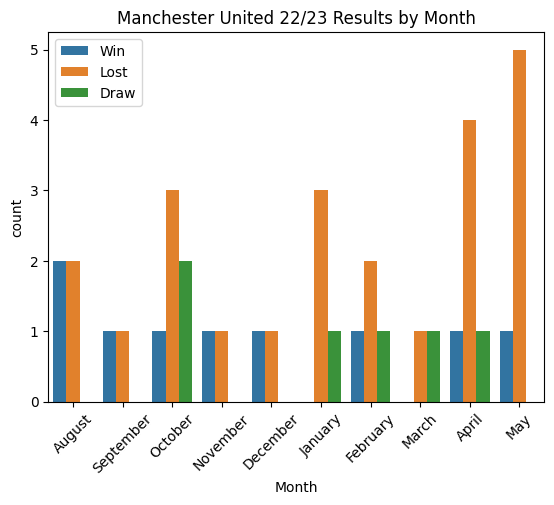

In [146]:
sns.countplot(data=ManUtd23, x='Month', hue='Result')
plt.xticks(rotation=45)
plt.title("Manchester United 22/23 Results by Month")
plt.legend()
plt.show()

**The losses throughout the season were consistent, which divided opinions on ETH’s debut 
season, especially toward the end, when United lost almost 70% of their games, leaving 
fans furious rather than reassured.However, 
unlike ETH’s campaign, there wasn’t a prolonged streak of defeats in 2020/21, making that 
season feel more competitive and respectable despite the disappointment.**

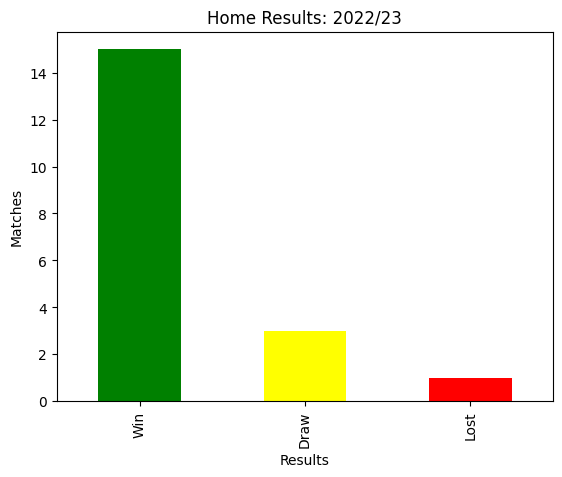

In [147]:
colors = ['green', 'yellow', 'red']
ManuHome['Result'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Results')
plt.ylabel('Matches')
plt.title('Home Results: 2022/23')
plt.show()


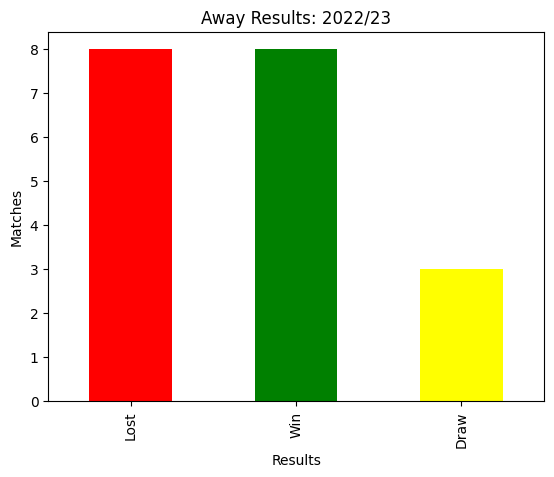

In [148]:
colors = ['red', 'green', 'yellow']
ManuAway['Result'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Results')
plt.ylabel('Matches')
plt.title('Away Results: 2022/23')
plt.show()


**Unlike the 2020/21 campaign, 
where their unbeaten away streak defined the season and masked their home 
struggles, the 2022/23 reversal highlighted a complete role switch – Old 
Trafford once again became their stronghold while their away performances 
lacked the same resilience and consistency.**

In [ ]:
goals_df23.info()

In [149]:
homeutdxG=ManuHome['xG'].sum()
homexGA=ManuHome['xG.1'].sum()
homexGD=homeutdxG-homexGA

awayutdxG=ManuAway['xG.1'].sum()
awayxGA=ManuAway['xG'].sum()
awayxGD= awayutdxG - awayxGA

homeGoals=goals_df23['Home Goals'].sum()
homeGoalsA=goals_df23['Goals Conceded Home'].sum()
homeGD= homeGoals - homeGoalsA

awayGoals=goals_df23['Away Goals'].sum()
awayGoalsA=goals_df23['Goals Conceded Away'].sum()
awayGD= awayGoals - awayGoalsA




In [150]:
GD=pd.DataFrame({
    'United Goals': [homeGoals],
    'Opponent Goals': [homeGoalsA],
    'Home GD': [homeGD],
    'United Away Goals':[awayGoals],
    'Opponent Goals Away': [awayGoalsA],
    'Away GD': [awayGD],
    'United xG':[homeutdxG],
    'Opponent xG':[homexGA],
    'Expected HomeGD': [homexGD],
    'United  Away xG' :[awayutdxG],
    'Opponent xG Away': [awayxGA],
    'Expected AwayGD': [awayxGD]
})

In [151]:
GD

,United Goals,Opponent Goals,Home GD,United Away Goals,Opponent Goals Away,Away GD,United xG,Opponent xG,Expected HomeGD,United Away xG,Opponent xG Away,Expected AwayGD
0,36,10,26,22,33,-11,40.8,19.3,21.5,26.7,31.0,-4.3


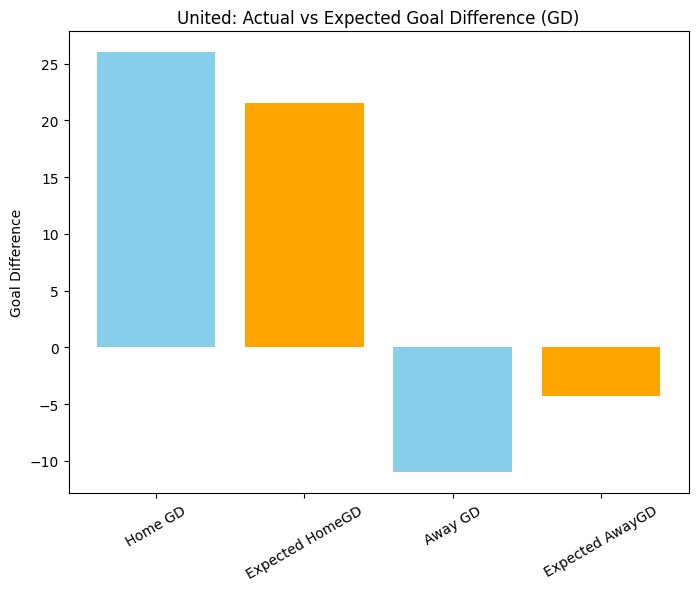

In [152]:
gd_comparison = GD[['Home GD', 'Expected HomeGD', 'Away GD', 'Expected AwayGD']].melt(
    var_name="Metric", value_name="Value"
)


plt.figure(figsize=(8,6))
plt.bar(gd_comparison["Metric"], gd_comparison["Value"], color=["skyblue","orange","skyblue","orange"])
plt.title("United: Actual vs Expected Goal Difference (GD)")
plt.ylabel("Goal Difference")
plt.xticks(rotation=30)

plt.show()

**Overall Takeaway**

**At Home: United underperformed the xG model – wasteful in attack and leaky in 
defense.**

**Away: United massively underperformed – both attack and defense fell short of 
what the underlying numbers suggested.**

**This season contrasts strongly with 2020/21, where United hugely overperformed away 
from home. However, under ETH united underperformed at both Home & Away.**

# CONCLUSION
**Overall, the comparison between Manchester United’s 2020/21 and 2022/23 campaigns 
highlights two very different stories. Under Ole Gunnar Solskjaer, the team thrived away 
from home with a remarkable unbeaten run, even though their home form was 
inconsistent. In contrast, Erik ten Hag’s debut season showed great resilience at Old 
Trafford, turning it back into a fortress, but the away struggles and late-season collapse 
exposed the fragility of his side. While both seasons carried their own strengths and 
weaknesses, the contrast lies in consistency. Solskjaer’s United lacked balance between 
home and away, while Ten Hag’s lacked stability across the whole season. Ultimately, both 
eras underline the same theme: moments of promise overshadowed by shortcomings that 
prevented Manchester United from reaching the very top**